In [1]:
pip install scikit-plot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, accuracy_score,classification_report,roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import BernoulliNB

import statsmodels.api as sm
import scikitplot as skplt

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
credit = pd.read_csv('/content/drive/MyDrive/Data mining/Credit card fraud detection/creditcard.csv')
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
credit.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
duplicate_rows = credit[credit.duplicated()]
print("number of duplicate rows: ", duplicate_rows.shape)

number of duplicate rows:  (1081, 31)


In [9]:
credit.drop_duplicates(keep='first', inplace=True)
print(credit.shape)

(283726, 31)


# Distribution plots

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

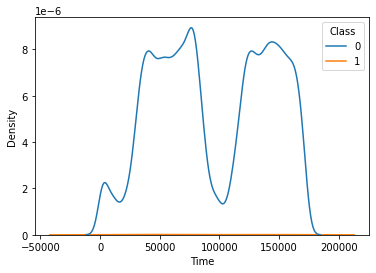

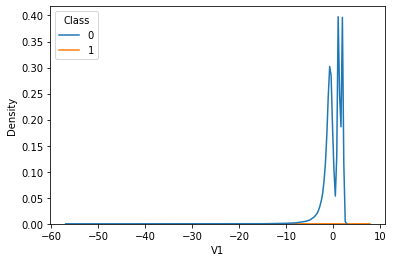

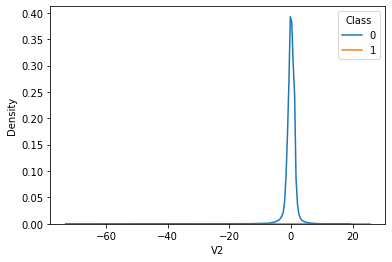

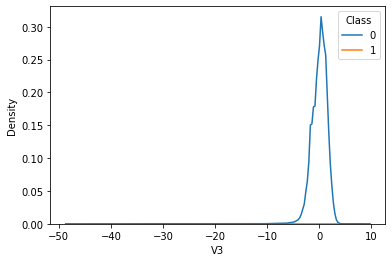

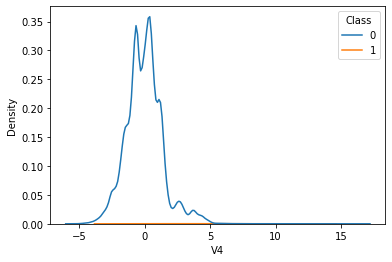

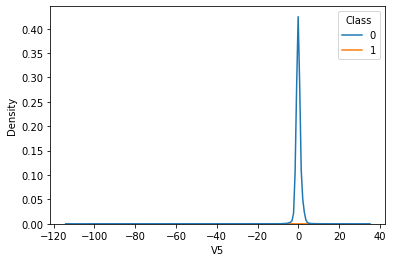

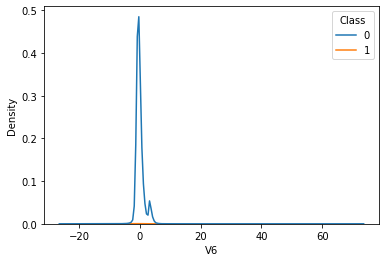

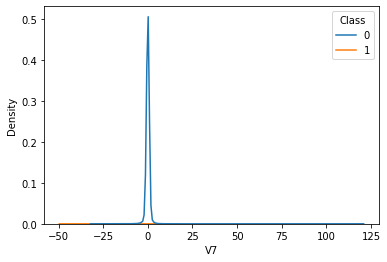

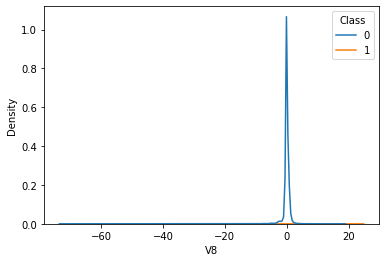

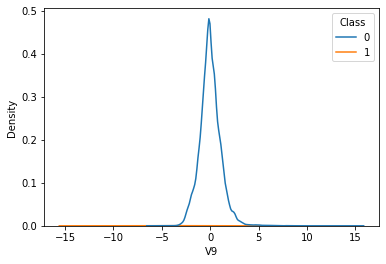

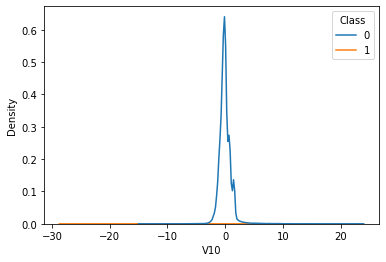

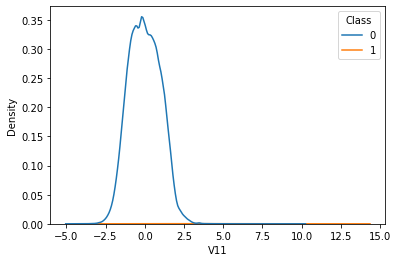

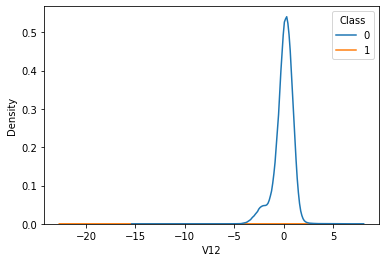

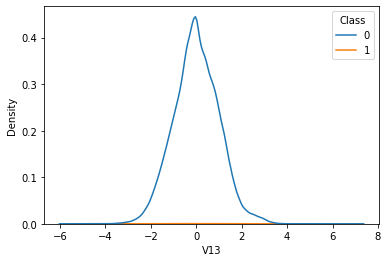

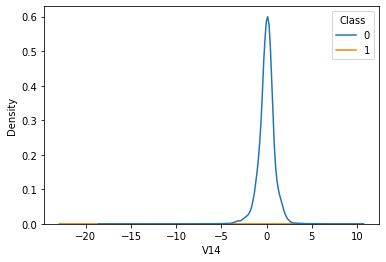

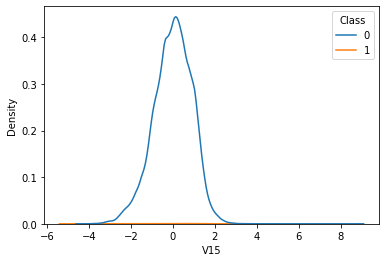

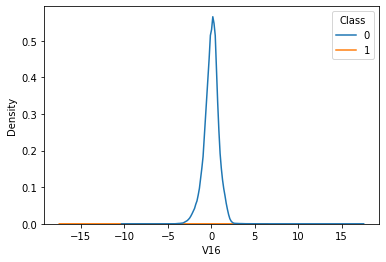

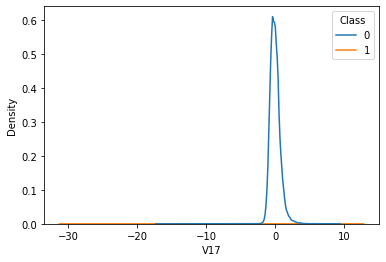

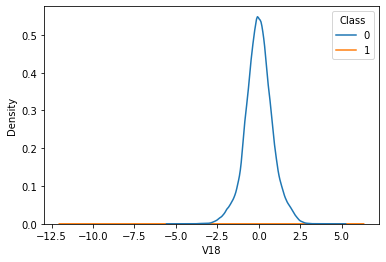

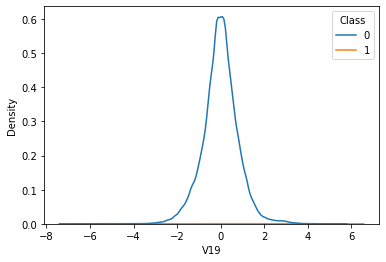

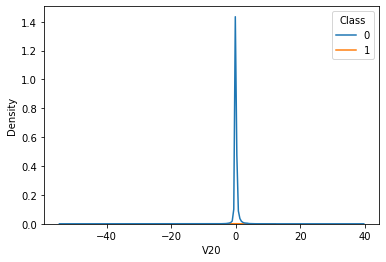

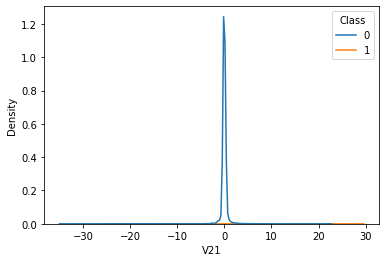

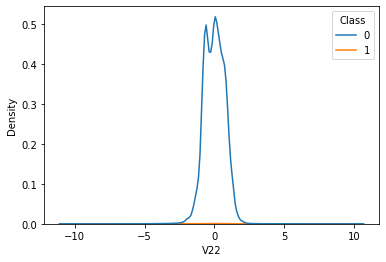

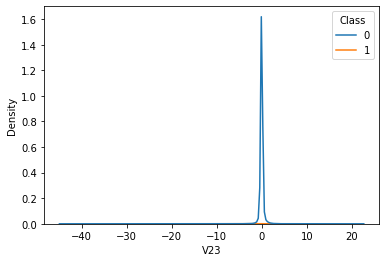

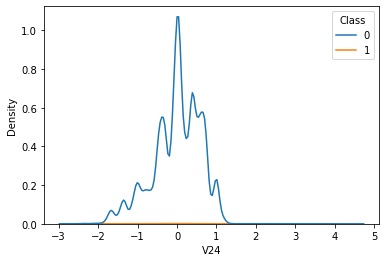

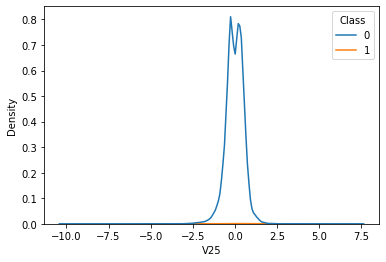

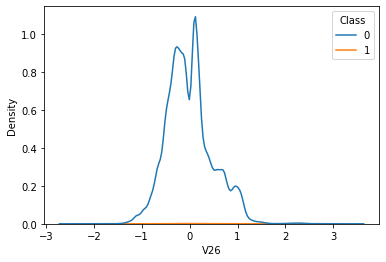

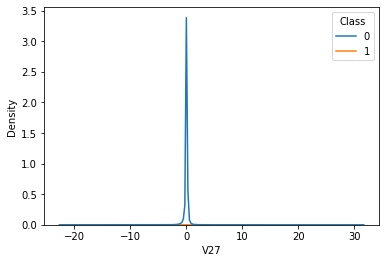

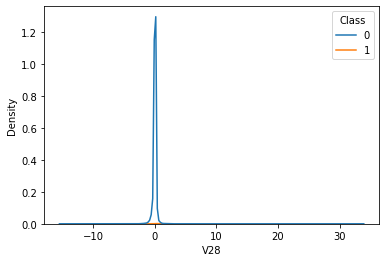

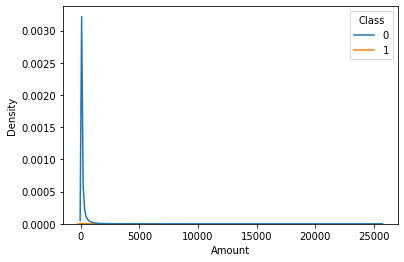

In [10]:
for i,cont in enumerate(credit.iloc[:, 0:-1]):
    plt.figure(i)
    sns.kdeplot(data=credit, x=cont, hue='Class')

# Target distribution

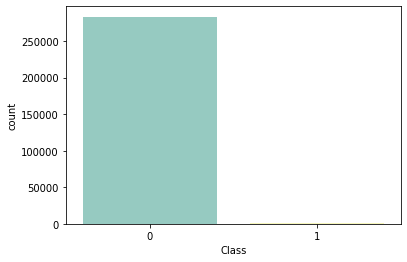

In [11]:
sns.countplot(x='Class', data=credit, palette="Set3")

In [12]:
time_delta = pd.to_timedelta(credit['Time'], unit='s')
credit['time_in_hour'] = (time_delta.dt.components.hours).astype(int)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


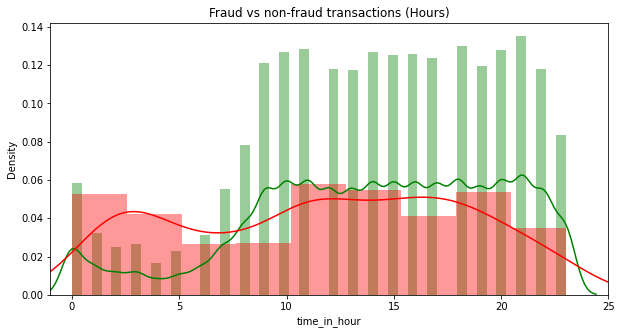

In [13]:
plt.figure(figsize=(10,5))
sns.distplot(credit[credit['Class'] == 0]["time_in_hour"], color='g')
sns.distplot(credit[credit['Class'] == 1]["time_in_hour"], color='r')
plt.title('Fraud vs non-fraud transactions (Hours)')
plt.xlim([-1,25])
plt.show()

In [14]:
credit = credit.drop(['time_in_hour'], axis=1)

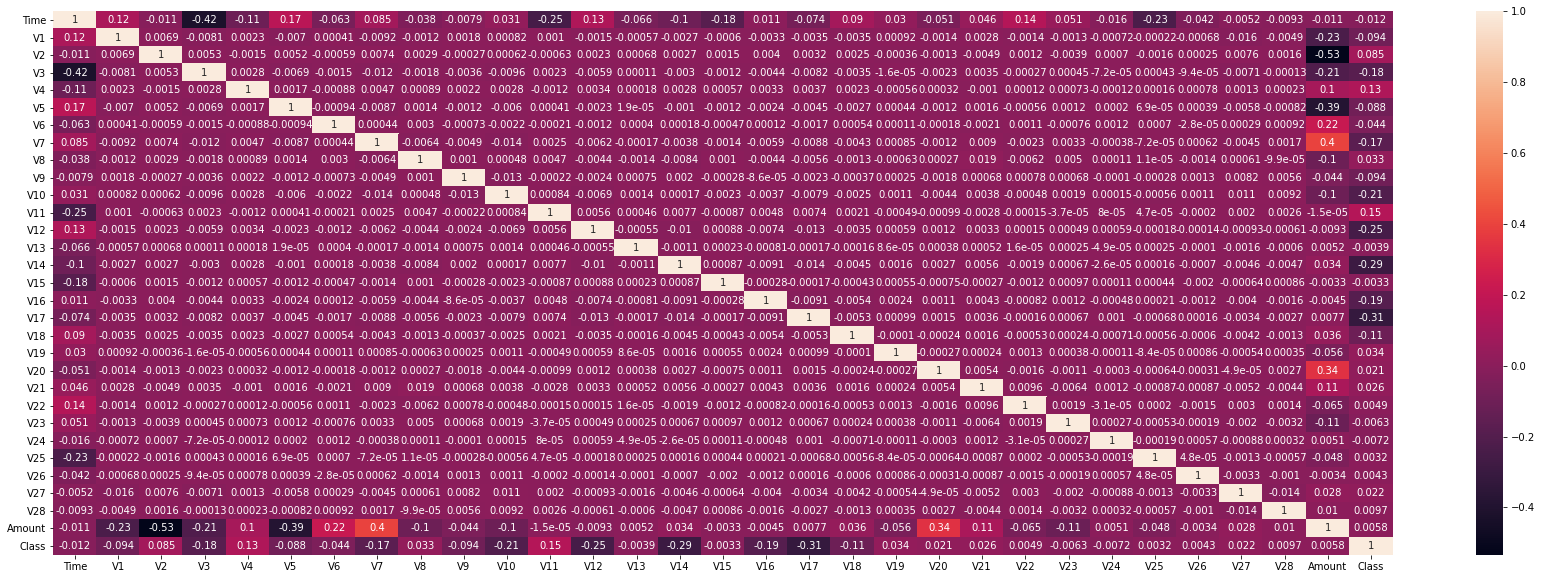

In [15]:
# Compute the correlation matrix
plt.figure(figsize=(30,10))
sns.heatmap(credit.corr(),annot=True,linecolor='white',linewidths=0)

# Random Forest

In [16]:
X=credit.iloc[:,0:-1]
Y=credit[['Class']]
Y=Y.values.reshape(-1,1)

#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42) # 80% training and 20% test


In [17]:
model_rnf = RandomForestClassifier(n_estimators=50,random_state=42 )
model_rnf.fit(X_train, y_train)

y_pred_rnf = model_rnf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [18]:
model_rnf.score(X_test,y_test)

0.9995065731505305

In [19]:
cnf=confusion_matrix(y_test,y_pred_rnf)
cnf

array([[56654,     2],
       [   26,    64]])

In [20]:
print(classification_report(y_test, y_pred_rnf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.71      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



In [21]:
feature_imp = pd.Series(model_rnf.feature_importances_).sort_values(ascending=False)
feature_imp

14    0.173034
17    0.150030
12    0.101850
10    0.088005
16    0.068696
4     0.029494
11    0.028393
9     0.028322
7     0.026647
2     0.026052
26    0.024654
3     0.024248
18    0.021461
8     0.016353
20    0.015638
21    0.015311
1     0.014292
27    0.014139
22    0.014076
6     0.013095
19    0.012869
5     0.012467
15    0.011820
29    0.011296
28    0.011145
0     0.010912
24    0.009977
13    0.009833
25    0.009697
23    0.006195
dtype: float64

<BarContainer object of 30 artists>

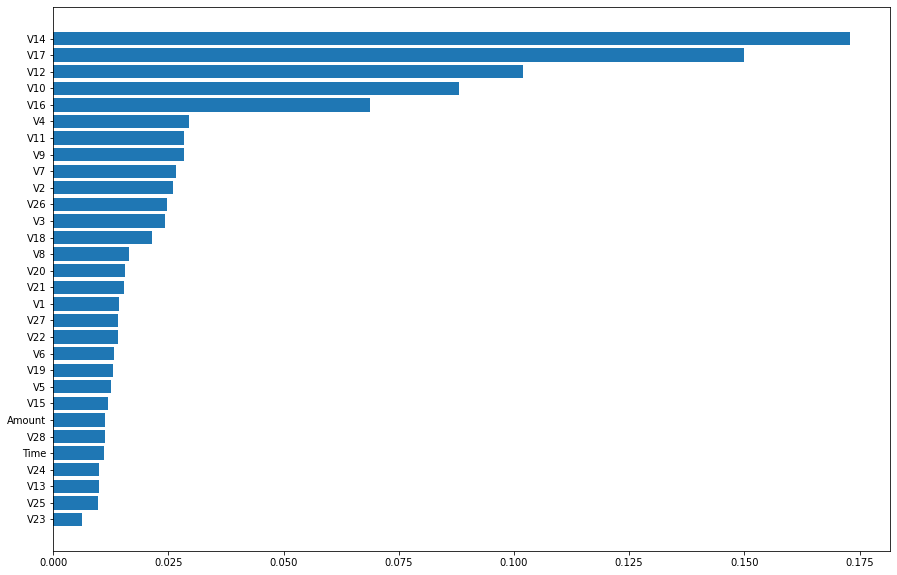

In [22]:
#Visualization for important features
plt.figure(figsize=(15,10))
sorted_col = model_rnf.feature_importances_.argsort()
plt.barh(X.columns[sorted_col], model_rnf.feature_importances_[sorted_col])

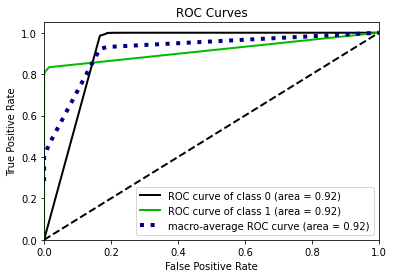

In [23]:
skplt.metrics.plot_roc(y_test, model_rnf.predict_proba(X_test),plot_micro=False)
plt.show()

# Remove least important features

In [24]:
X_new=X[['V14','V17','V12','V10','V16','V4','V11','V9','V7','V2','V26','V3','V18','V8','V21','V20']]  
X_new

,V14,V17,V12,V10,V16,V4,V11,V9,V7,V2,V26,V3,V18,V8,V21,V20
0,-0.311169,0.207971,-0.617801,0.090794,-0.470401,1.378155,-0.551600,0.363787,0.239599,-0.072781,-0.189115,2.536347,0.025791,0.098698,-0.018307,0.251412
1,-0.143772,-0.114805,1.065235,-0.166974,0.463917,0.448154,1.612727,-0.255425,-0.078803,0.266151,0.125895,0.166480,-0.183361,0.085102,-0.225775,-0.069083
2,-0.165946,1.109969,0.066084,0.207643,-2.890083,0.379780,0.624501,-1.514654,0.791461,-1.340163,-0.139097,1.773209,-0.121359,0.247676,0.247998,0.524980
3,-0.287924,-0.684093,0.178228,-0.054952,-1.059647,-0.863291,-0.226487,-1.387024,0.237609,-0.185226,-0.221929,1.792993,1.965775,0.377436,-0.108300,-0.208038
4,-1.119670,-0.237033,0.538196,0.753074,-0.451449,0.403034,-0.822843,0.817739,0.592941,0.877737,0.502292,1.548718,-0.038195,-0.270533,-0.009431,0.408542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,4.626942,1.991691,2.711941,4.356170,1.107641,-2.066656,-1.593105,1.914428,-4.918215,10.071785,0.250034,-9.834783,0.510632,7.305334,0.213454,1.475829
284803,-0.675143,-0.025693,0.915802,-0.975926,-0.711757,-0.738589,-0.150189,0.584800,0.024330,-0.055080,-0.395255,2.035030,-1.221179,0.294869,0.214205,0.059616
284804,-0.510602,0.313502,0.063119,-0.484782,0.140716,-0.557828,0.411614,0.432454,-0.296827,-0.301254,-0.087371,-3.249640,0.395652,0.708417,0.232045,0.001396
284805,0.449624,0.509928,-0.962886,-0.399126,-0.608577,0.689799,-1.933849,0.392087,-0.686180,0.530483,0.546668,0.702510,1.113981,0.679145,0.265245,0.127434


In [25]:
#Split dataset into training set and test set
X_train_ft, X_test_ft, y_train_ft, y_test_ft = train_test_split(X_new, Y, test_size=0.2, random_state=42) 

In [26]:
model_rnf_ft = RandomForestClassifier(n_estimators=50,random_state=42) 
model_rnf_ft.fit(X_train_ft, y_train_ft)

y_pred_rnf_ft = model_rnf_ft.predict(X_test_ft)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [27]:
cnf=confusion_matrix(y_test_ft,y_pred_rnf_ft)
cnf

array([[56654,     2],
       [   25,    65]])

In [28]:
model_rnf_ft.score(X_test_ft,y_test_ft)

0.9995241955380115

In [29]:
print(classification_report(y_test_ft, y_pred_rnf_ft))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.72      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



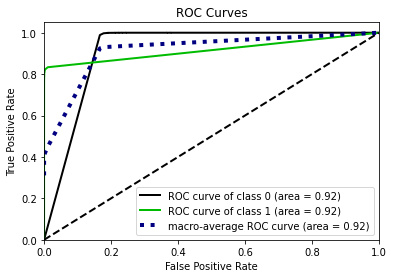

In [30]:
skplt.metrics.plot_roc(y_test_ft, model_rnf_ft.predict_proba(X_test_ft),plot_micro=False)
plt.show()

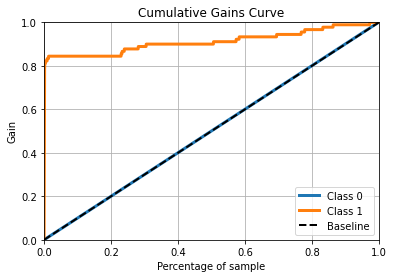

In [31]:
skplt.metrics.plot_cumulative_gain(y_test_ft, model_rnf_ft.predict_proba(X_test_ft))
plt.show()

In [32]:
print("Accuracy:", accuracy_score(y_test_ft,y_pred_rnf_ft))
print("F1 Score:", f1_score(y_test_ft,y_pred_rnf_ft))
print("Precision:", precision_score(y_test_ft,y_pred_rnf_ft))
print("Recall:", recall_score(y_test_ft,y_pred_rnf_ft))

Accuracy: 0.9995241955380115
F1 Score: 0.8280254777070063
Precision: 0.9701492537313433
Recall: 0.7222222222222222


# Logistic Regression

In [33]:
X=credit.iloc[:,0:-1]
Y=credit[['Class']]
Y=Y.values.reshape(-1,1)

In [34]:
sc = StandardScaler()
x = X.values
x_scaled=sc.fit_transform(x)
X= pd.DataFrame(x_scaled, columns=X.columns)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42, stratify=Y)
logistic= LogisticRegression(penalty='l2',C=1.0, random_state=42,solver='lbfgs')

In [36]:
logistic.fit(X_train,y_train)

y_pred = logistic.predict(X_test)
print(logistic.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9991188806259472


In [37]:
cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index=['Actual[0]','Actual[1]'], columns=['Predict[0]','Predict[1]'])
cm

,Predict[0],Predict[1]
Actual[0],56641,10
Actual[1],40,55


In [38]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.85      0.58      0.69        95

    accuracy                           1.00     56746
   macro avg       0.92      0.79      0.84     56746
weighted avg       1.00      1.00      1.00     56746



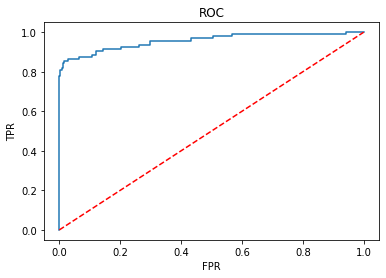

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, logistic.predict_proba(X_test)[:,1])

plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],'r--')
plt.plot([fpr],[tpr], 'r-',ms=10)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC')
plt.show()

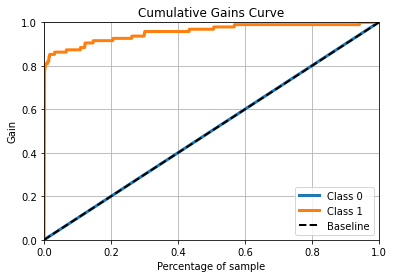

In [40]:
skplt.metrics.plot_cumulative_gain(y_test, logistic.predict_proba(X_test))
plt.show()

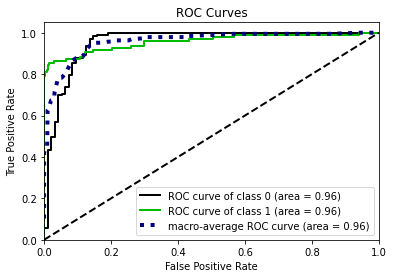

In [41]:
skplt.metrics.plot_roc(y_test, logistic.predict_proba(X_test),plot_micro=False)
plt.show()

In [42]:
X_train['Intercept']=1
X_test['Intercept']=1
logistic_ml= sm.Logit(y_train,X_train).fit()
logistic_ml.summary2()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Optimization terminated successfully.
         Current function value: 0.003758
         Iterations 13


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
================================================================
Model:              Logit            Pseudo R-squared: 0.695    
Dependent Variable: y                AIC:              1767.8490
Date:               2021-09-17 05:37 BIC:              2088.1601
No. Observations:   226980           Log-Likelihood:   -852.92  
Df Model:           30               LL-Null:          -2796.0  
Df Residuals:       226949           LLR p-value:      0.0000   
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     13.0000                                     
-----------------------------------------------------------------
             Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Time        -0.1052    0.1216   -0.8647  0.3872  -0.3435   0.1332
V1           0.1760    0.0912    1.9300  0.0536  -0.0027   0.3548
V2          -0.0027    0.1069   -0.0249  0.9801  -0.2122   0.2069
V3          -0.0273    0.0893   -0.3055  0.7600  -0.2023   0.1478
V4           0.9236    0.1131    8.1678  0.0000   0.7020   1.1452
V5           0.1624    0.1030    1.5767  0.1149  -0.0395   0.3642
V6          -0.1071    0.1068   -1.0037  0.3155  -0.3164   0.1021
V7          -0.1196    0.0932   -1.2830  0.1995  -0.3023   0.0631
V8          -0.1980    0.0395   -5.0148  0.0000  -0.2754  -0.1206
V9          -0.3409    0.1335   -2.5526  0.0107  -0.6026  -0.0791
V10         -0.9191    0.1131   -8.1273  0.0000  -1.1407  -0.6974
V11         -0.0894    0.0954   -0.9375  0.3485  -0.2764   0.0975
V12          0.0864    0.0973    0.8873  0.3749  -0.1044   0.2772
V13         -0.2574    0.0953   -2.7009  0.0069  -0.4441  -0.0706
V14         -0.5800    0.0662   -8.7636  0.0000  -0.7098  -0.4503
V15         -0.1492    0.0897   -1.6629  0.0963  -0.3251   0.0267
V16         -0.1283    0.1226   -1.0466  0.2953  -0.3685   0.1120
V17         -0.0134    0.0660   -0.2024  0.8396  -0.1427   0.1160
V18         -0.0258    0.1219   -0.2118  0.8322  -0.2647   0.2130
V19          0.0947    0.0895    1.0576  0.2902  -0.0808   0.2702
V20         -0.3556    0.0710   -5.0110  0.0000  -0.4947  -0.2165
V21          0.2982    0.0496    6.0076  0.0000   0.2009   0.3954
V22          0.5273    0.1112    4.7404  0.0000   0.3093   0.7453
V23         -0.0471    0.0431   -1.0927  0.2745  -0.1316   0.0374
V24          0.1441    0.1005    1.4340  0.1516  -0.0529   0.3411
V25         -0.0206    0.0778   -0.2646  0.7913  -0.1730   0.1318
V26         -0.0255    0.1035   -0.2463  0.8055  -0.2283   0.1774
V27         -0.3281    0.0531   -6.1799  0.0000  -0.4322  -0.2240
V28         -0.1002    0.0317   -3.1653  0.0015  -0.1623  -0.0382
Amount       0.2278    0.1109    2.0537  0.0400   0.0104   0.4452
Intercept   -8.7398    0.1676  -52.1350  0.0000  -9.0684  -8.4112
================================================================

"""

In [43]:
# Based on 99% confidence interval

# Null hypothesis(H0): ai = 0 (No impact)
# Alternative hypothesis(H1): ai != 0 (Important)

# At 99% confidence level,
#        if p < 0.01
#         cannot accept H0 - Important
#        else 
#         cannot reject H0 - No impact

In [44]:
#V4, V8,V10, V13,V14,V20,V21, V22, V27, V28,Amount are statistically significant features

In [45]:
train= X.iloc[:, [4,8,10,13,14,20,21,22,27,28]]
train.head()

,V4,V8,V10,V13,V14,V20,V21,V22,V27,V28
0,0.976623,0.084434,0.085688,-0.996550,-0.327050,0.326273,-0.024777,0.383483,0.333033,-0.065850
1,0.318998,0.072903,-0.153784,0.490735,-0.151252,-0.089963,-0.311372,-0.881454,-0.027154,0.043219
2,0.270648,0.210788,0.194242,0.719981,-0.174539,0.681564,0.343094,1.065068,-0.144325,-0.183824
3,-0.608355,0.320843,-0.049713,0.509483,-0.302638,-0.270428,-0.149093,0.007299,0.154039,0.185687
4,0.287092,-0.228725,0.700958,1.351427,-1.176125,0.530343,-0.012516,1.101780,0.550001,0.654234


In [46]:
trainX= X.iloc[:, [1,4,8,9,10,13,14,20,21,22,27,28]]
trainX

,V1,V4,V8,V9,V10,V13,V14,V20,V21,V22,V27,V28
0,-0.701082,0.976623,0.084434,0.333534,0.085688,-0.996550,-0.327050,0.326273,-0.024777,0.383483,0.333033,-0.065850
1,0.608792,0.318998,0.072903,-0.231703,-0.153784,0.490735,-0.151252,-0.089963,-0.311372,-0.881454,-0.027154,0.043219
2,-0.700336,0.270648,0.210788,-1.381169,0.194242,0.719981,-0.174539,0.681564,0.343094,1.065068,-0.144325,-0.183824
3,-0.499064,-0.608355,0.320843,-1.264664,-0.049713,0.509483,-0.302638,-0.270428,-0.149093,0.007299,0.154039,0.185687
4,-0.597606,0.287092,-0.228725,0.747917,0.700958,1.351427,-1.176125,0.530343,-0.012516,1.101780,0.550001,0.654234
...,...,...,...,...,...,...,...,...,...,...,...,...
283721,-6.102103,-1.459282,6.196662,1.749010,4.048299,-0.693028,4.858879,1.916461,0.295375,0.154412,2.380049,2.509507
283722,-0.379208,-0.520175,0.250814,0.535282,-0.905314,1.219729,-0.709290,0.077182,0.296413,1.275826,0.168567,-0.164849
283723,0.982354,-0.392355,0.601561,0.396215,-0.449033,-0.185149,-0.536491,0.001570,0.321057,0.798074,0.006802,-0.082640
283724,-0.126465,0.489870,0.576734,0.359367,-0.369456,-1.047474,0.471924,0.165259,0.366919,1.104223,0.270523,0.317004


In [47]:
X_train, X_test, y_train, y_test = train_test_split(trainX, Y, test_size=0.2, random_state=42, stratify=Y)
logistic= LogisticRegression(penalty='l2',C=1.0, random_state=42,solver='lbfgs')

In [48]:
logistic.fit(X_train,y_train)

y_pred = logistic.predict(X_test)
print(logistic.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9991012582384662


In [49]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))

Accuracy: 0.9991012582384662
F1 Score: 0.679245283018868
Precision: 0.84375
Recall: 0.5684210526315789


In [50]:
cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index=['Actual[0]','Actual[1]'], columns=['Predict[0]','Predict[1]'])
cm

,Predict[0],Predict[1]
Actual[0],56641,10
Actual[1],41,54


In [51]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.84      0.57      0.68        95

    accuracy                           1.00     56746
   macro avg       0.92      0.78      0.84     56746
weighted avg       1.00      1.00      1.00     56746



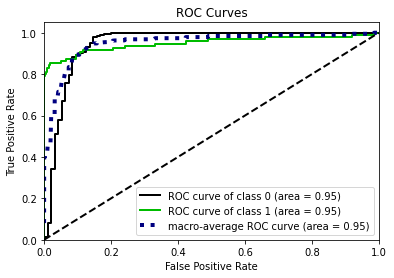

In [52]:
skplt.metrics.plot_roc(y_test, logistic.predict_proba(X_test),plot_micro=False)
plt.show()

# Naive Bayes

In [53]:
credit = pd.read_csv('/content/drive/MyDrive/Data mining/Credit card fraud detection/creditcard.csv')
credit

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [54]:
X=credit.iloc[:,0:-1]
Y=credit[['Class']]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [55]:
bnb = BernoulliNB(alpha=1.0, class_prior=[0.9,0.1])
bnb.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB(alpha=1.0, binarize=0.0, class_prior=[0.9, 0.1], fit_prior=True)

In [56]:
y_pred = bnb.predict(X_test)
print(bnb.score(X_test,y_test))

0.9981039991573329


In [57]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))

Accuracy: 0.9981039991573329
F1 Score: 0.5970149253731343
Precision: 0.47058823529411764
Recall: 0.8163265306122449


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.47      0.82      0.60        98

    accuracy                           1.00     56962
   macro avg       0.74      0.91      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [59]:
cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index=['Actual[0]','Actual[1]'], columns=['Predict[0]','Predict[1]'])
cm

,Predict[0],Predict[1]
Actual[0],56774,90
Actual[1],18,80


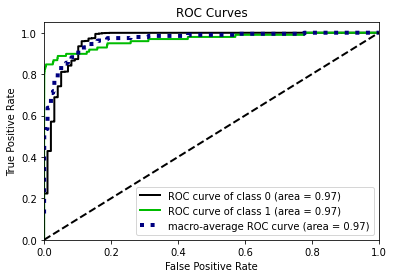

In [60]:
skplt.metrics.plot_roc(y_test, bnb.predict_proba(X_test), plot_micro=False)
plt.show()

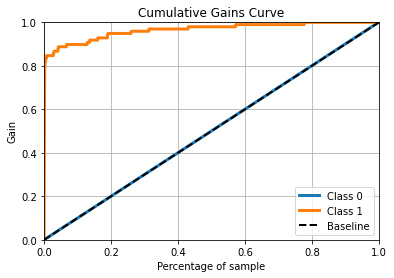

In [61]:
skplt.metrics.plot_cumulative_gain(y_test, bnb.predict_proba(X_test))
plt.show()

In [62]:
X_new=X[['V14','V17','V12','V10','V16','V4','V11','V9','V7','V2','V26','V3','V18','V8','V21','V20','V1','V27','V22','V6','V19','V5']]   #
X_new

,V14,V17,V12,V10,V16,V4,V11,V9,V7,V2,V26,V3,V18,V8,V21,V20,V1,V27,V22,V6,V19,V5
0,-0.311169,0.207971,-0.617801,0.090794,-0.470401,1.378155,-0.551600,0.363787,0.239599,-0.072781,-0.189115,2.536347,0.025791,0.098698,-0.018307,0.251412,-1.359807,0.133558,0.277838,0.462388,0.403993,-0.338321
1,-0.143772,-0.114805,1.065235,-0.166974,0.463917,0.448154,1.612727,-0.255425,-0.078803,0.266151,0.125895,0.166480,-0.183361,0.085102,-0.225775,-0.069083,1.191857,-0.008983,-0.638672,-0.082361,-0.145783,0.060018
2,-0.165946,1.109969,0.066084,0.207643,-2.890083,0.379780,0.624501,-1.514654,0.791461,-1.340163,-0.139097,1.773209,-0.121359,0.247676,0.247998,0.524980,-1.358354,-0.055353,0.771679,1.800499,-2.261857,-0.503198
3,-0.287924,-0.684093,0.178228,-0.054952,-1.059647,-0.863291,-0.226487,-1.387024,0.237609,-0.185226,-0.221929,1.792993,1.965775,0.377436,-0.108300,-0.208038,-0.966272,0.062723,0.005274,1.247203,-1.232622,-0.010309
4,-1.119670,-0.237033,0.538196,0.753074,-0.451449,0.403034,-0.822843,0.817739,0.592941,0.877737,0.502292,1.548718,-0.038195,-0.270533,-0.009431,0.408542,-1.158233,0.219422,0.798278,0.095921,0.803487,-0.407193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,4.626942,1.991691,2.711941,4.356170,1.107641,-2.066656,-1.593105,1.914428,-4.918215,10.071785,0.250034,-9.834783,0.510632,7.305334,0.213454,1.475829,-11.881118,0.943651,0.111864,-2.606837,-0.682920,-5.364473
284803,-0.675143,-0.025693,0.915802,-0.975926,-0.711757,-0.738589,-0.150189,0.584800,0.024330,-0.055080,-0.395255,2.035030,-1.221179,0.294869,0.214205,0.059616,-0.732789,0.068472,0.924384,1.058415,-1.545556,0.868229
284804,-0.510602,0.313502,0.063119,-0.484782,0.140716,-0.557828,0.411614,0.432454,-0.296827,-0.301254,-0.087371,-3.249640,0.395652,0.708417,0.232045,0.001396,1.919565,0.004455,0.578229,3.031260,-0.577252,2.630515
284805,0.449624,0.509928,-0.962886,-0.399126,-0.608577,0.689799,-1.933849,0.392087,-0.686180,0.530483,0.546668,0.702510,1.113981,0.679145,0.265245,0.127434,-0.240440,0.108821,0.800049,0.623708,2.897849,-0.377961


In [63]:
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, test_size=0.2,random_state=42)

In [64]:
bnb = BernoulliNB(alpha=1.0, class_prior=[0.9,0.1])
bnb.fit(X_train,y_train)

y_pred = bnb.predict(X_test)
print(bnb.score(X_test,y_test))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9982093325374811


In [65]:
print("Accuracy:", accuracy_score(y_test,y_pred))
print("F1 Score:", f1_score(y_test,y_pred))
print("Precision:", precision_score(y_test,y_pred))
print("Recall:", recall_score(y_test,y_pred))

Accuracy: 0.9982093325374811
F1 Score: 0.6015625
Precision: 0.4873417721518987
Recall: 0.7857142857142857


In [66]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.49      0.79      0.60        98

    accuracy                           1.00     56962
   macro avg       0.74      0.89      0.80     56962
weighted avg       1.00      1.00      1.00     56962



In [67]:
cm = pd.DataFrame(confusion_matrix(y_test,y_pred), index=['Actual[0]','Actual[1]'], columns=['Predict[0]','Predict[1]'])
cm

,Predict[0],Predict[1]
Actual[0],56783,81
Actual[1],21,77


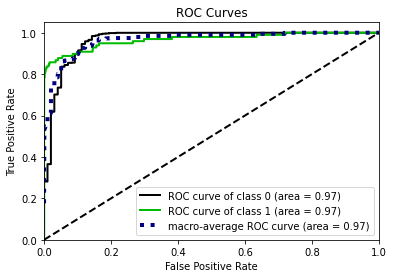

In [68]:
skplt.metrics.plot_roc(y_test, bnb.predict_proba(X_test), plot_micro=False)
plt.show()